<a href="https://colab.research.google.com/github/medeirosgian/Data-Science/blob/main/Estudos/Classifica%C3%A7%C3%A3o/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set style (Seaborn)
sns.set_style()

# Import dos dados
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data') #Não usar dados de Cleveland
columns = ['age', 'sex', 'cp', 'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal',	'num']
df.columns = columns

# Substituir valores '?' em todo o DataFrame
for col in columns:
  df.loc[df[col]=='?', col] = 0.0

print("Tamanho de df: {}\n".format(df.shape))
df.tail()

Tamanho de df: (293, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
288,52,1,4,160,331,0,0,94,1,2.5,0,0,0,1
289,54,0,3,130,294,0,1,100,1,0.0,2,0,0,1
290,56,1,4,155,342,1,0,150,1,3.0,2,0,0,1
291,58,0,2,180,393,0,0,110,1,1.0,2,0,7,1
292,65,1,4,130,275,0,1,115,1,1.0,2,0,0,1


In [ ]:
# Contar valores de num
print(df['num'].value_counts())

0    187
1    106
Name: num, dtype: int64


In [ ]:
# Import SciKitLearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Import e criação do modelo
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, criterion='entropy')

# Separar os dados
x = df.drop('num', axis=1)
y = df['num']

# Dividir dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y)

# Realizar fit do modelo
model.fit(X_train, y_train);

# Realizar predict
y_pred = model.predict(X_test)

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        48
           1       0.70      0.73      0.72        26

    accuracy                           0.80        74
   macro avg       0.78      0.78      0.78        74
weighted avg       0.80      0.80      0.80        74



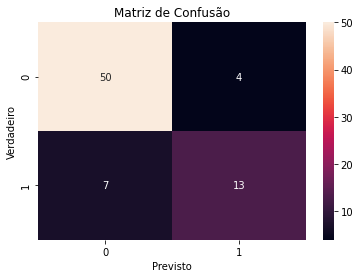

In [ ]:
# Plotar a matriz de confusão gráfica
fig, ax = plt.subplots();
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax);

# Configurando gráfico
ax.set_title('Matriz de Confusão');
ax.set_ylabel('Verdadeiro');
ax.set_xlabel('Previsto');

In [ ]:
# Novo modelo com Under-Sapling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler();
X_res, y_res = rus.fit_sample(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Criação do modelo novo
model_new = DecisionTreeClassifier(max_depth=1, criterion='entropy')

# Realizar fit do modelo
model_new.fit(X_res, y_res);

# Realizar predict
y_pred_new = model_new.predict(X_test)

In [ ]:
# Classification report
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        48
           1       0.66      0.81      0.72        26

    accuracy                           0.78        74
   macro avg       0.77      0.79      0.77        74
weighted avg       0.80      0.78      0.79        74



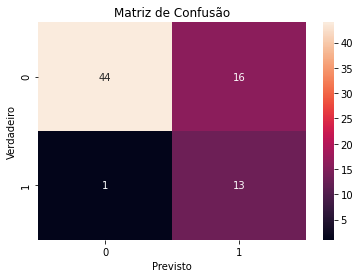

In [ ]:
# Plotar a matriz de confusão gráfica
fig, ax = plt.subplots();
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, ax=ax);

# Configurando gráfico
ax.set_title('Matriz de Confusão');
ax.set_ylabel('Verdadeiro');
ax.set_xlabel('Previsto');